## Task-1: Load a dataset

In [206]:
from sklearn import datasets

#### Digits Dataset

This dataset is made up of 1797 8x8 images. Each image is of a hand-written digit. We have around ~180 samples per class.
Link: https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [207]:
# load the dataset

digits = datasets.load_digits()

In [208]:
# meta-deta of the dataset

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [209]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [210]:
# a 2D array contains (n_samples, n_features)
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [211]:
digits.data.shape

(1797, 64)

In [212]:
digits.data[0].shape

(64,)

In [213]:
# no. of classes/categories

digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [214]:
digits.images.shape

(1797, 8, 8)

In [215]:
# Pixel values for first image in the dataset

digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [216]:
digits.images[0].shape

(8, 8)

#### Let's visualize the dataset

In [217]:
# Commonly used plotting library in Python

import matplotlib.pyplot as plt

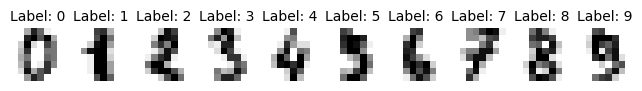

In [218]:
_, axes = plt.subplots(nrows = 1, ncols = 10, figsize = (8, 3))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()    # remove extra lines and decors from the plot
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title("Label: %i" % label, fontsize = 10)

#### Explore the IRIS dataset

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length.
Link: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [219]:
iris = datasets.load_iris()

In [220]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [221]:
print('categories:', iris.target_names)

categories: ['setosa' 'versicolor' 'virginica']


In [222]:
print('feature_names:', iris.feature_names)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [223]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Task-2: Train a model on the dataset

In [224]:
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split

In [225]:
# Size of the dataset

n_samples = len(digits.images)
print('Total samples: ', n_samples)

Total samples:  1797


To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,).

In [226]:
digits.images.shape

(1797, 8, 8)

In [227]:
# Flatten the images to ensure a uniform feature space

data = digits.images.reshape((n_samples, -1))

In [228]:
data.shape

(1797, 64)

In [229]:
# Create a classifier: a Support Vector classifier

clf = svm.SVC(gamma = 0.001, C = 100.)

In [230]:
# Split data into 50% train and 50% test subsets

# data: (n_samples, n_features)
# target: (output_classes)

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.5, shuffle = False)

In [231]:
X_train

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  2., ..., 14.,  0.,  0.],
       [ 0.,  1., 12., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  3.,  0.,  0.]])

In [232]:
y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5,
       4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6,
       4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2,
       8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
       0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,

In [233]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

SVC(C=100.0, gamma=0.001)

In [234]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

IN code above the values of SVC parameters (gamma and C) are selected manually. To find the optimal values of these hyperparameters, grid search and/or cross validation is used.

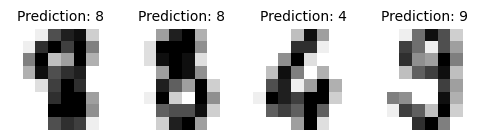

In [235]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (6, 2))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}", fontsize = 10)

In [236]:
print(f"Classification Report for Classifier {clf}:\n")
print(metrics.classification_report(y_test, predicted))

Classification Report for Classifier SVC(C=100.0, gamma=0.001):

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



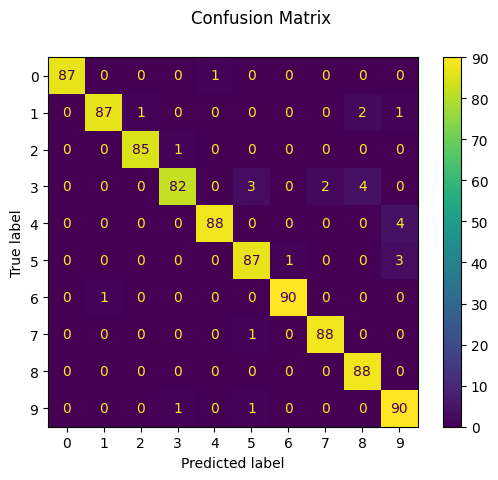

In [237]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

If the results from evaluating a classifier are stored in the form of a **confusion matrix** and not in terms of **y_true** and **y_pred**, one can still build a **classification_report** as follows:

In [238]:
y_true = [] # to store the true class labels (ground truth)
y_pred = [] # to store the predicted class labels

cm = disp.confusion_matrix # extracts the confusion matrix
cm

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 87,  1,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 82,  0,  3,  0,  2,  4,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 87,  1,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 88,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 90]], dtype=int64)

In [239]:
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

In [240]:
print("Classification Report rebuilt from Confusion Matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n")

Classification Report rebuilt from Confusion Matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.96      0.97        91
           2       0.99      0.99      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.98      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.92      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




## Task-3: Refitting and Updating Parameters

In [241]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [257]:
X, y = load_iris(return_X_y = True)
X.shape

(150, 4)

In [258]:
y.shape

(150,)

In [243]:
clf = SVC()
clf.set_params(kernel = 'linear').fit(X, y)
clf.predict(X[:15])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [244]:
clf.set_params(kernel = 'rbf').fit(X, y)
clf.predict(X[:15])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Task – 4: Multi-Class and Multilabel Classification
In the below case, the classifier is fit on a 1d array of multiclass labels and the predict() method therefore provides corresponding multiclass predictions. It is also possible to fit upon a 2d array of binary label indicators:

In [245]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

In [246]:
X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

In [247]:
classif = OneVsRestClassifier(estimator = SVC(random_state = 0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

Below, the classifier is fit() on a 2d binary label representation of y, using the LabelBinarizer. In this case predict() returns a 2d array representing the corresponding multilabel predictions.

Note that the fourth and fifth instances returned all zeroes, indicating that they matched none of the three labels fit upon. With multilabel outputs, it is similarly possible for an instance to be assigned multiple labels:

In [248]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [249]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

In the case above, the classifier is fit upon instances each assigned multiple labels. The MultiLabelBinarizer is used to binarize the 2d array of multilabels to fit upon. As a result, predict() returns a 2d array with multiple predicted labels for each instance.

## Task – 5: Hyperparameter tuning

You can use grid search to find the best hyperparameters for your SVM classifier. Grid search is a technique to systematically search through a range of hyperparameter values to find the combination that results in the best model performance.

In [250]:
from sklearn.model_selection import GridSearchCV

In [251]:
# Define the hyperparameter grid you want to search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [252]:
# Create a GridSearchCV object with your classifier and the hyperparameter grid
grid_search = GridSearchCV(svm.SVC(), param_grid, cv = 5, n_jobs = -1)

In [253]:
# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [254]:
# Print the best hyperparameters found by the grid search
print("Best hyperparameters found: ", grid_search.best_params_)

Best hyperparameters found:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [255]:
# Get the best estimator (classifier) from the grid search
best_classifier = grid_search.best_estimator_

In [256]:
# Use the best classifier to make predictions
predicted = best_classifier.predict(X_test)

In [261]:
iris_data = datasets.load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [262]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [267]:
X = iris_data.data
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [269]:
y = iris_data.target
y[:5]

array([0, 0, 0, 0, 0])

In [264]:
y = LabelBinarizer().fit_transform(iris_data.target_names)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [270]:
# Define the hyperparameter grid you want to search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [271]:
# Create a GridSearchCV object with your classifier and the hyperparameter grid
grid_search = GridSearchCV(svm.SVC(), param_grid, cv = 5, n_jobs = -1)

In [ ]:
# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

In [273]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Use y_onehot

# Define the SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Create a grid search object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)  # Use y_train instead of y_train_onehot

# Get the best model from grid search
best_svm = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00
